<a href="https://colab.research.google.com/github/SreenuBalasundhram/Heart-diseases-Prediction/blob/main/roy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Heart Disesae Prediction**

> Indented block



In [2]:
# importing required Library Files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [3]:
# importing data(.csv) file
df =pd.read_csv('Heart_Disease_Prediction.csv')

**HEAD FUNCTION **

In [4]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


**Feature Scaling**

In [5]:
continuous_features = ['Age', 'Sex','Chest pain type', 'BP', 'Cholesterol','FBS over 120', 'EKG results','Max HR','Exercise angina',
                       'ST depression','Slope of ST','Number of vessels fluro','Thallium','Heart Disease']
features_to_convert = [feature for feature in df.columns if feature not in continuous_features]
df[features_to_convert] = df[features_to_convert].astype('int')
df.dtypes


Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

***STUDY FUNCTIONS***

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


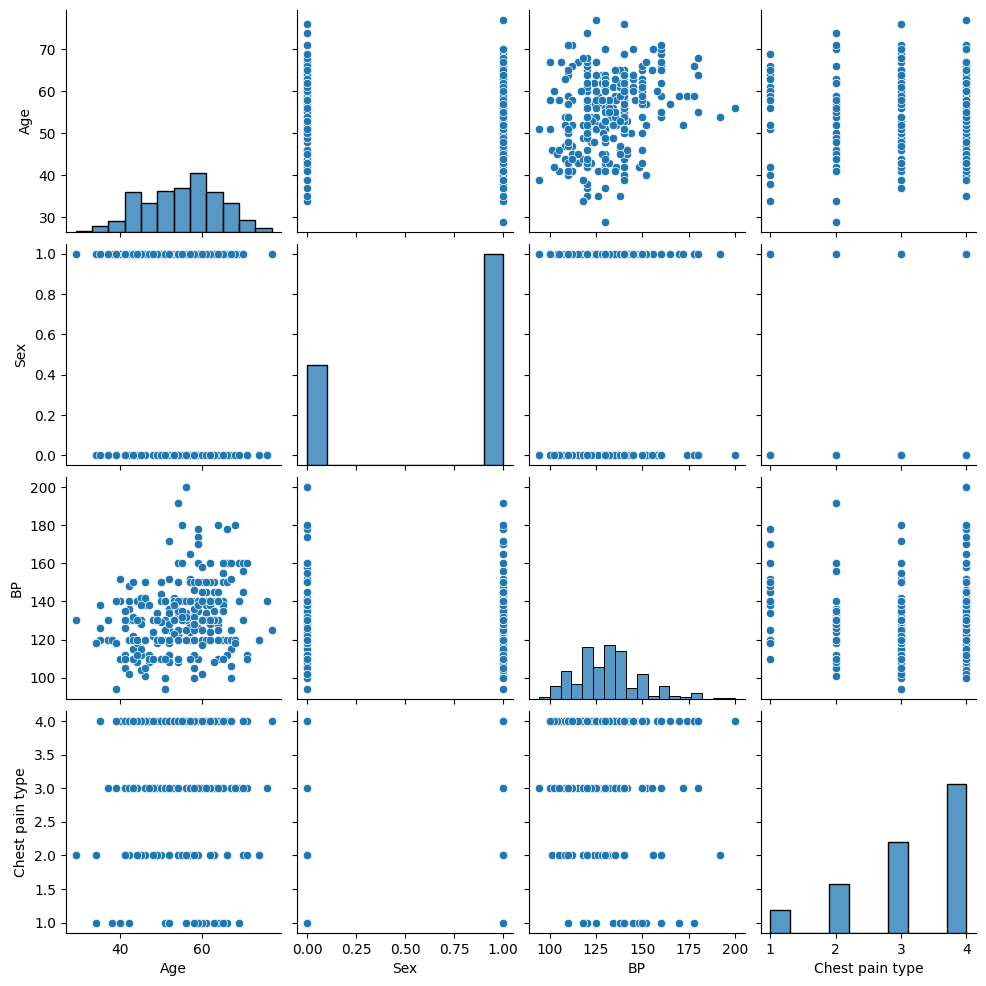

In [6]:
col_study=['Age','Sex','BP','Chest pain type']
sns.pairplot(df[col_study],size=2.5);
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


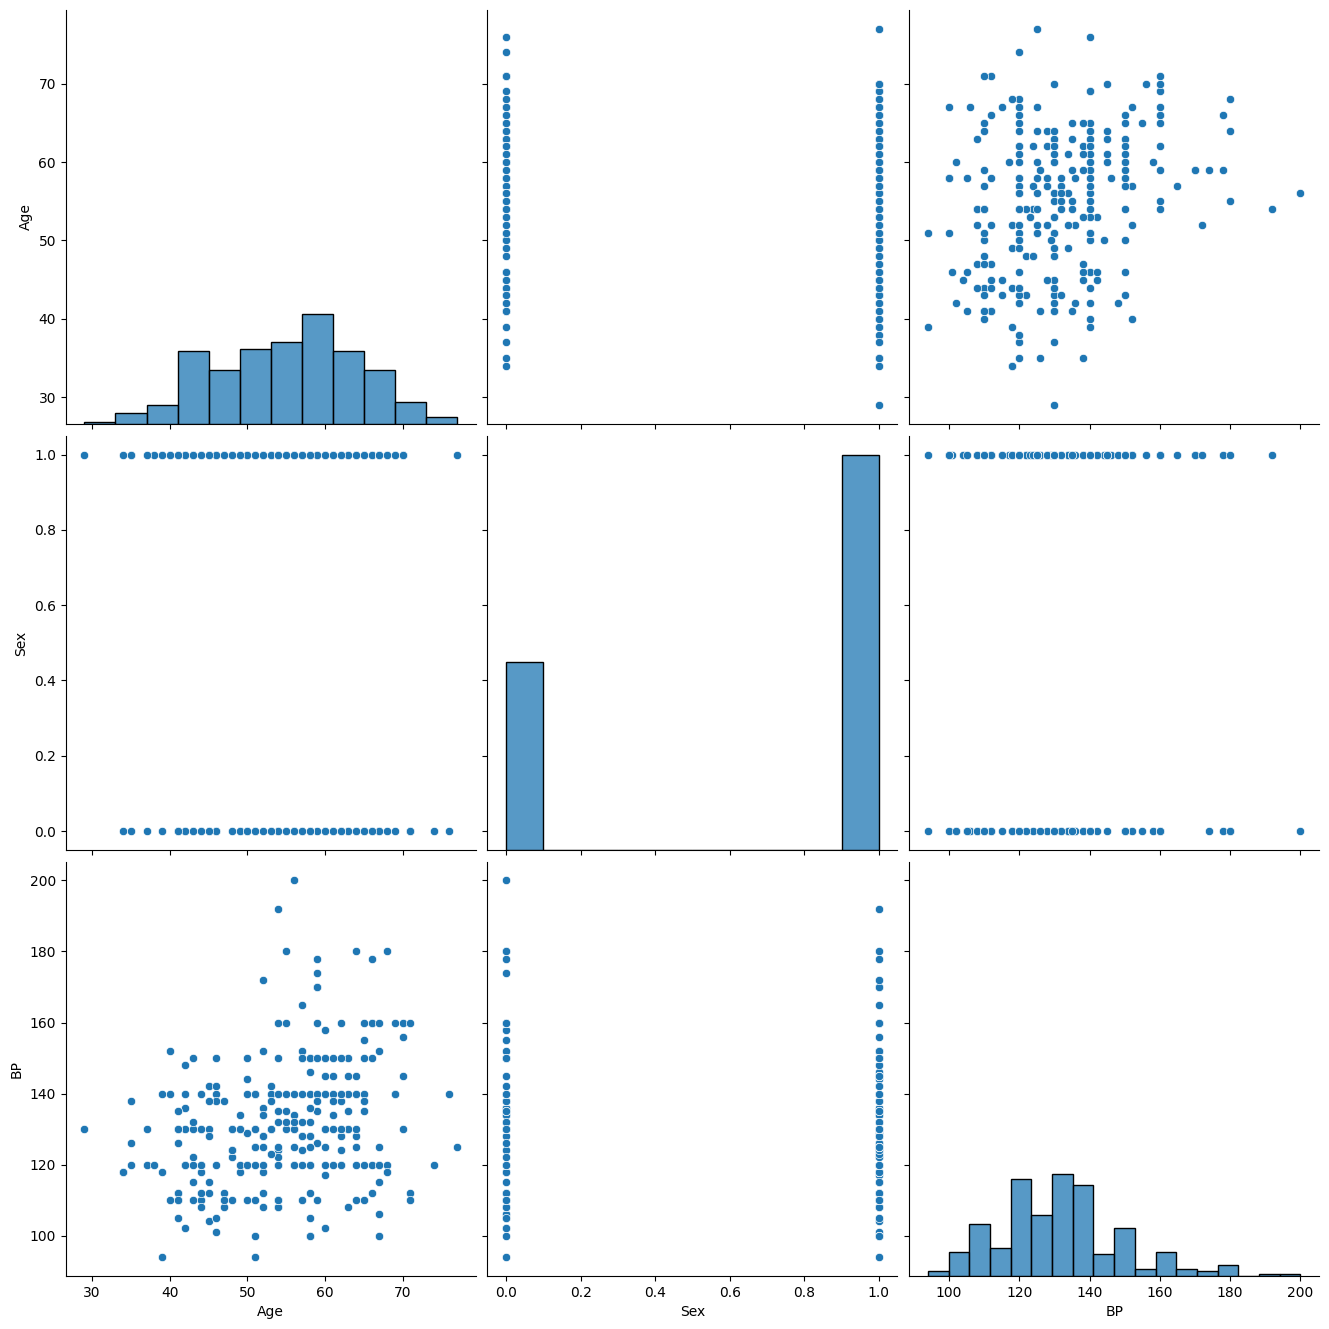

In [7]:
col_study=['Age','Sex','BP']
sns.pairplot(df[col_study],size=4.5);
plt.show()

**INFORMATION CONTENTS**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

***CORRELATION***

In [9]:
df.corr()

<ipython-input-9-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333


***HEAT MAP FUNCTIONS***

<ipython-input-10-91b1ca0973f0>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


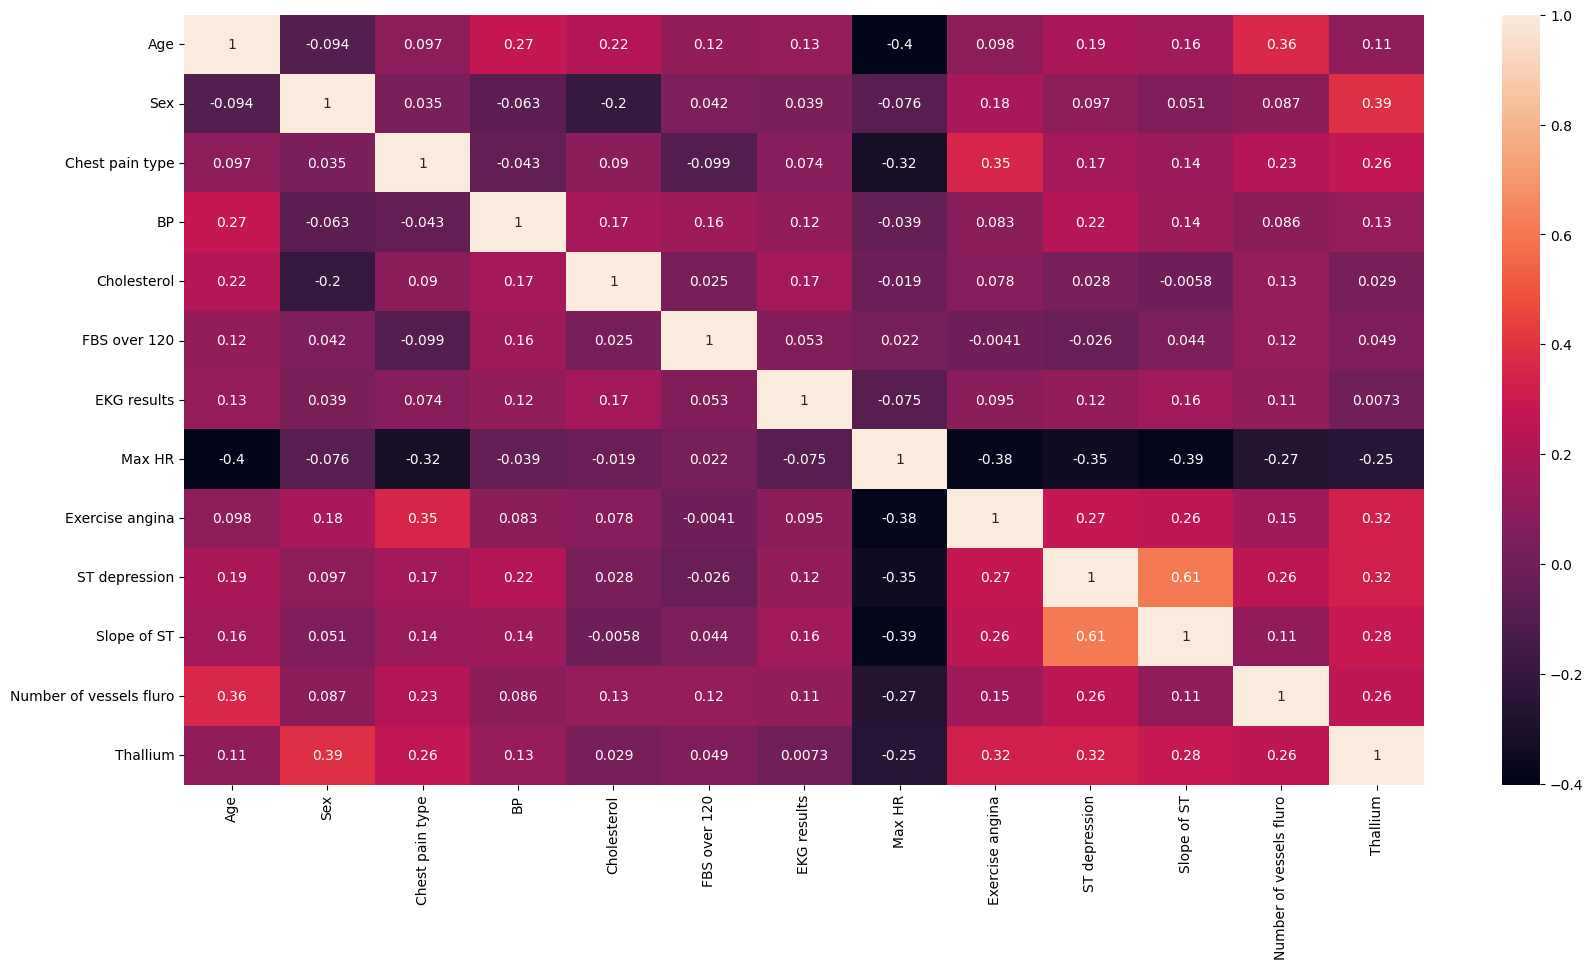

In [10]:
# Heat Map showing the corellation between the features
# where light color indicates the lesser correlation and viceversa
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

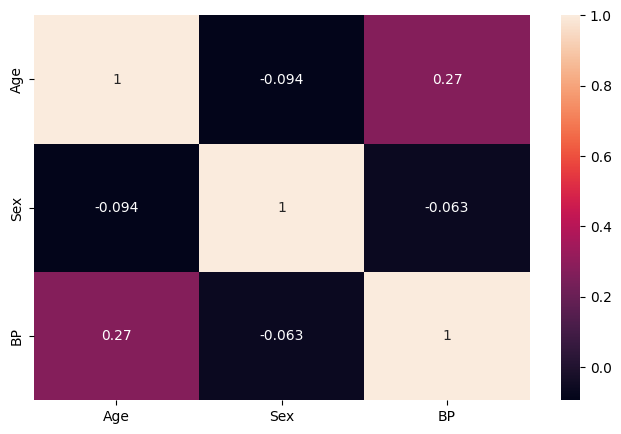

In [15]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['Age','Sex','BP']].corr(),annot=True)
plt.show()

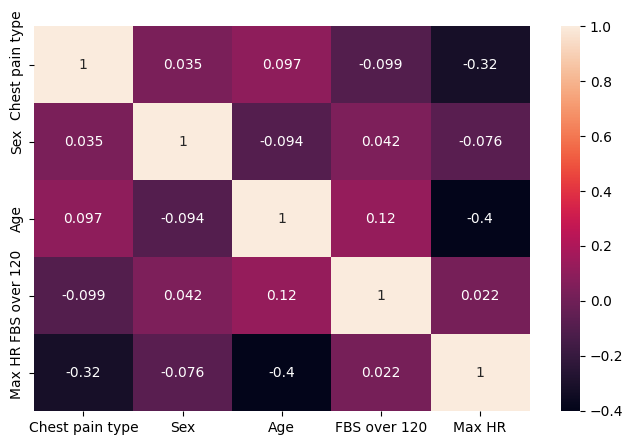

In [14]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['Chest pain type','Sex','Age','FBS over 120','Max HR']].corr(),annot=True)
plt.show()

***SCATTER PLOTS ***

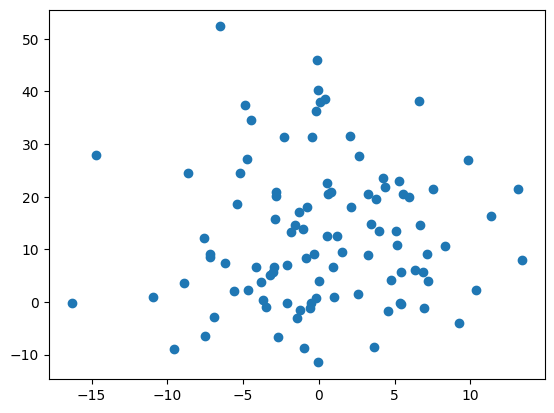

In [16]:
x =np.random.normal(0.5,5.0,100)
y =np.random.normal(12,15,100)

plt.scatter(x,y)
plt.show()

***PLOTING DIAGRAMS***

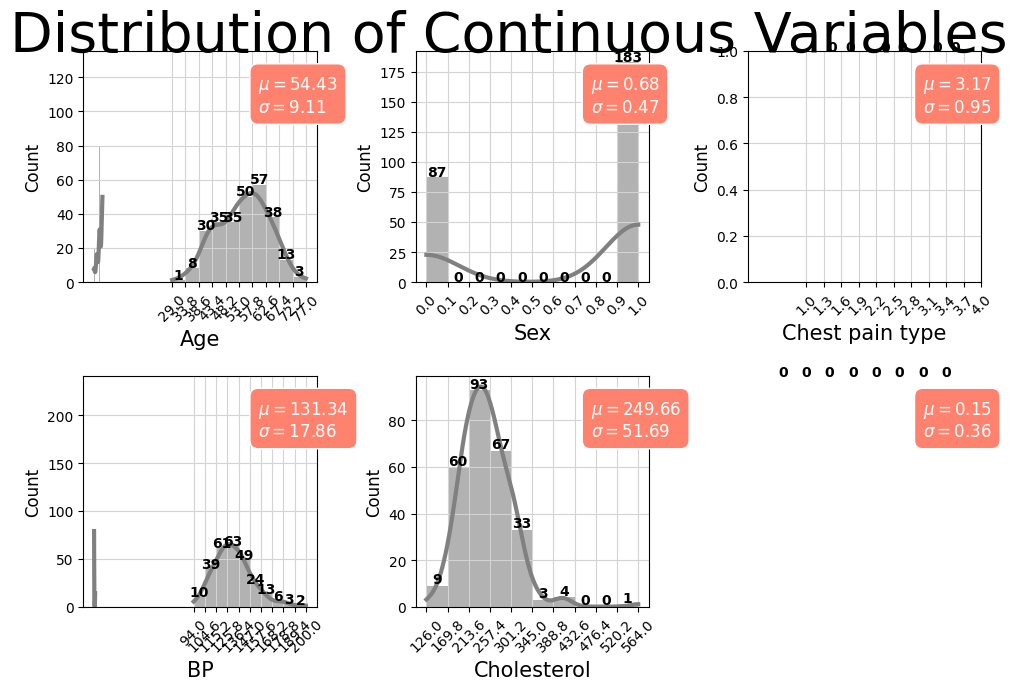

In [18]:
df_continuous = df[continuous_features]

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,7))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    if x == 2:
      break
    values, bin_edges = np.histogram(df_continuous[col],
    range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))
    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x , y % 2],
                         edgecolor='none', color='gray', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=40)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


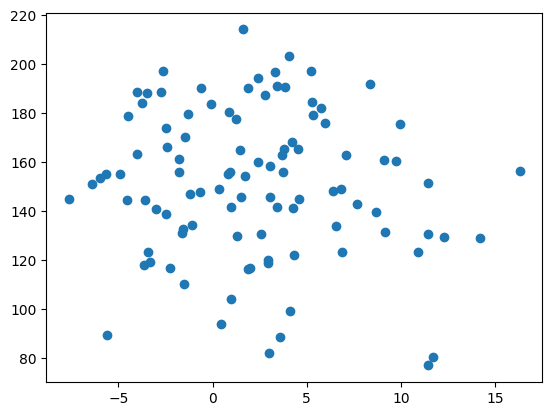

In [19]:
x =np.random.normal(2,5,100)
y =np.random.normal(150,30,100)

plt.scatter(x,y)
plt.show()

***IS NULL FUNCTIONS***

In [20]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [21]:
df.shape

(270, 14)

***MATPLOTLIB FUNCTIONS***

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Heart Disease', ylabel='count'>

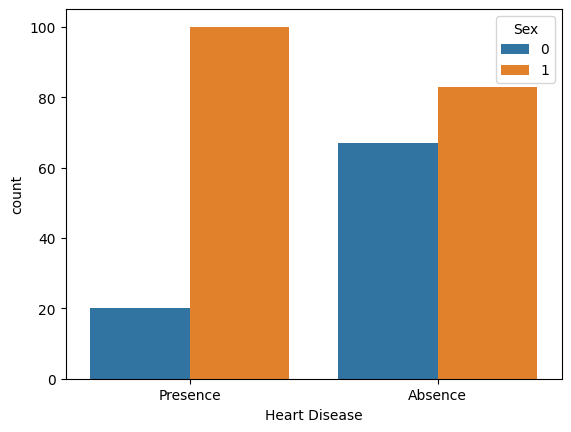

In [23]:
sns.countplot(x=df['Heart Disease'],hue='Sex',data=df)

***CSAE STUDY OF PLOTS***

<Axes: xlabel='Heart Disease', ylabel='count'>

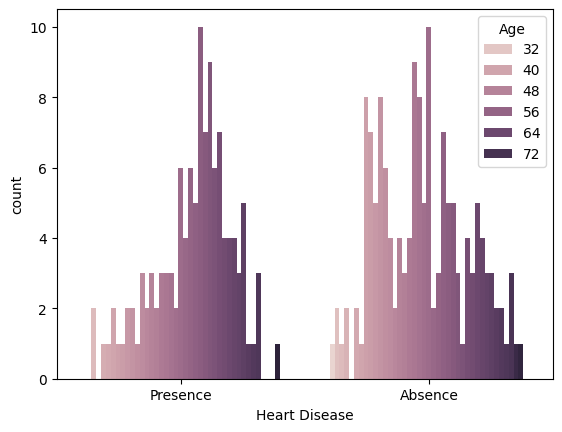

In [24]:
sns.countplot(x=df['Heart Disease'],hue='Age',data=df)

<Axes: xlabel='Heart Disease', ylabel='count'>

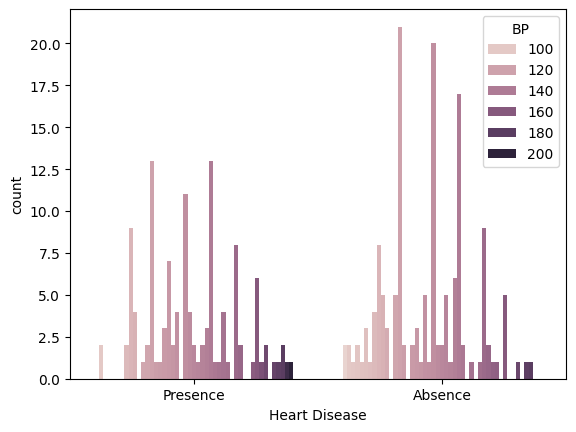

In [25]:
sns.countplot(x=df['Heart Disease'],hue='BP',data=df)

<Axes: xlabel='Heart Disease', ylabel='count'>

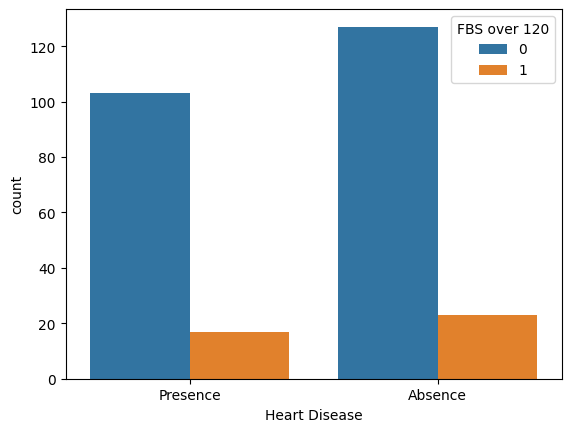

In [26]:
sns.countplot(x=df['Heart Disease'],hue='FBS over 120',data=df)

***SEABORN FUNCTIONS***

<ipython-input-27-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

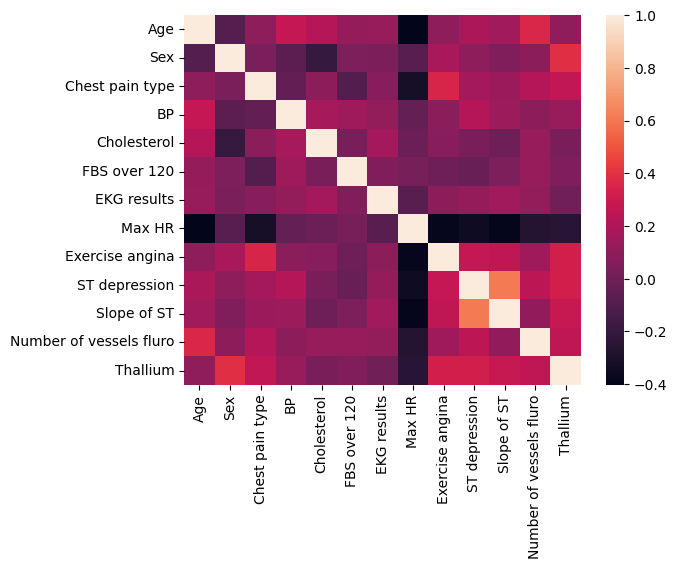

In [27]:
sns.heatmap(df.corr())

In [28]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
df['Heart Disease']=le.fit_transform(df['Heart Disease'])

In [29]:
y=df['Heart Disease']
x=df.drop(['Heart Disease'],axis=1)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
pred_1=lr.predict(x_test)
score_1=accuracy_score(y_test,pred_1)

In [32]:
score_1

0.7777777777777778

In [33]:
df['Sex'].value_counts()

1    183
0     87
Name: Sex, dtype: int64

In [34]:
male_count = 726
female_count = 194
total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# display the results
print(f"Male percentage in the data: {male_percentage:.2f}%")
print(f"Female Percentage in the data: {female_percentage:.2f}%")

# difference
difference_percentage = ((male_count - female_count) / female_count) * 100
print(f"Males are {difference_percentage:.2f}% more than females in the data.")

Male percentage in the data: 78.91%
Female Percentage in the data: 21.09%
Males are 274.23% more than females in the data.


In [35]:
df.groupby('Sex')['Age'].value_counts()

Sex  Age
0    62     7
     54     5
     60     5
     41     4
     51     4
           ..
1    29     1
     34     1
     37     1
     38     1
     77     1
Name: Age, Length: 73, dtype: int64

In [36]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [37]:
x = np.array(df.drop(columns='Heart Disease'))
y = np.array(df['Heart Disease'])

In [38]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,train_size=0.8)

In [40]:
x_scaled[0]

array([ 1.71209356,  0.6894997 ,  0.87092765, -0.07540984,  1.40221232,
       -0.41702883,  0.98166365, -1.75920811, -0.7012223 ,  1.18101235,
        0.67641928,  2.47268219, -0.87570581])

In [41]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

yPred = rfc.predict(x_test)

In [42]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len('presence')
n_errors = (yPred != y_test).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(y_test, yPred)
print("The accuracy is {}".format(acc))

The model used is Random Forest classifier
The accuracy is 0.8148148148148148


In [43]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred2 = logreg.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =',
      accuracy_score(y_test, y_pred2))

Accuracy of the model is = 0.8148148148148148
